# Classification - Data Exploration Exercise

In [7]:
import acquire
import prepare

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [8]:
df_iris = acquire.get_iris_data()
df_iris = prepare.prep_iris(df_iris)

In [9]:
df_iris["sepal_area"] = df_iris["sepal_length"] * df_iris["sepal_width"]
df_iris["petal_area"] = df_iris["petal_length"] * df_iris["petal_width"]

In [10]:
print(df_iris.isna().sum())
print(df_iris.shape)

sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species           0
species_encode    0
sepal_area        0
petal_area        0
dtype: int64
(150, 8)


## 1. Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df

In [11]:
x_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width", "sepal_area", "petal_area",]
y_vars = ["species", "species_encode"]
train_df, test_df = train_test_split(df_iris, test_size=0.3, random_state=123, stratify=df_iris[["species"]])

In [12]:
print("train", train_df.shape)
print("test", test_df.shape)

train (105, 8)
test (45, 8)


2. Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). The y-axis is the value of the variable. Use color to represent species as another dimension. Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. What are your takeaways from this visualization?

    - Some of the variables are clear indicators of the species.
    - I would look at petal length and width as key features. 
        - Petal length, followed by petal width, is the clearest.
            - Virginica has the longest petals (~4.8-7),
            - Then versicolor (~3-5.1),
            - Then setosa (~1-2). 
        - Setosa is particularly identifiable based on petal length and width.
    - Sepal length and width appear to have a relationship with species for setosa, but not the other two.

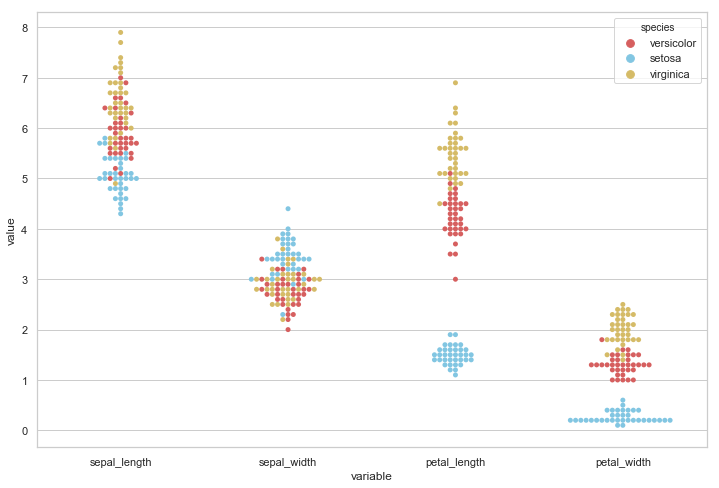

In [17]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train_df[["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]], id_vars="species", var_name="variable", value_name="value")
df_melt.head()
plt.figure(figsize=(12, 8))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="variable", y="value", hue="species",
              palette=["r", "c", "y"], data=df_melt)
plt.show()

## 3. Create 4 subplots (2 rows x 2 columns) of scatterplots
  - sepal_length x sepal_width
  - petal_length x petal_width
  - sepal_area x petal_area
  - sepal_length x petal_length
  - Make your figure size 14 x 8. What are your takeaways?
    
  - Petal length and width area still key features for identifying species.
  - Setosa may be the easiest to identify species.
  - The species fall into fairly clear groups when looking at petal_length x petal_width.
    - As petal length increases, so does petal width, and it appears to be linear.
  - There does not appear to be a relationship between sepal_length and sepal_width.
  - There are clear groupings along the petal_area axis, but not along the sepal_area axis.
  - There is somewhat of a linear relationship between sepal_length and petal_length, but not as clear as between the petal measurements.

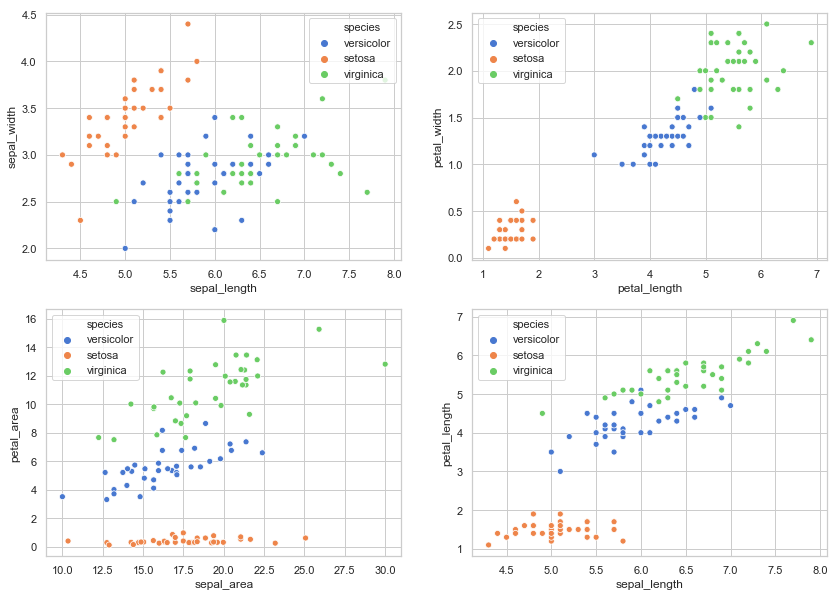

In [14]:
# plt.figure(figsize=(14, 8))
# plt.subplot(221)
# sns.scatterplot(x="sepal_length", y="sepal_width", data=train_df, hue="species")

# plt.subplot(222)
# sns.scatterplot(x="petal_length", y="petal_width", data=train_df, hue="species")

# plt.subplot(223)
# sns.scatterplot(x="sepal_area", y="petal_area", data=train_df, hue="species")

# plt.subplot(224)
# sns.scatterplot(x="sepal_length", y="petal_length", data=train_df, hue="species")

# plt.show()

sl = train_df['sepal_length']
sw = train_df['sepal_width']
pl = train_df['petal_length']
pw = train_df['petal_width']
sa = train_df["sepal_area"]
pa = train_df["petal_area"]

combos = [(sl, sw), (pl, pw), (sa, pa), (sl, pl)]

plt.figure(figsize=(14,10))

for i, (x, y) in enumerate(combos):
    plt.subplot(2,2, i+1)
    sns.scatterplot(x = x, y = y, hue=train_df['species'])
    # plt.title(f'{x.name} x {y.name}')

## 4. Create a heatmap of each variable layering correlation coefficient on top.

  - Sepal width has the weakest correlations with the other variables
  - Petal length has the highest correlations
    - Followed by petal width

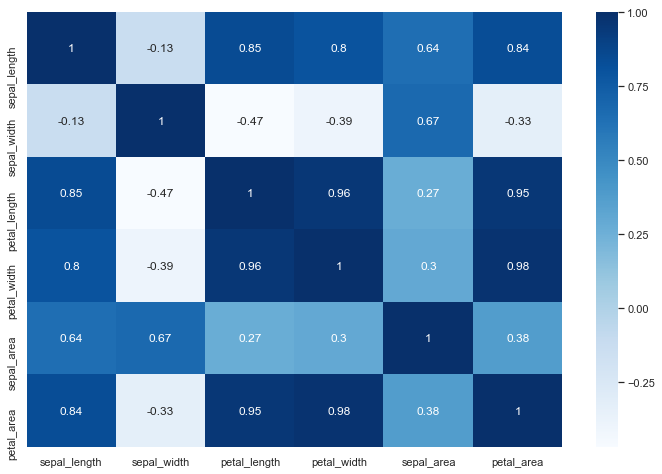

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[x_vars].corr(), cmap="Blues", annot=True)
plt.show()

5. Create a scatter matrix visualizing the interaction of each variable

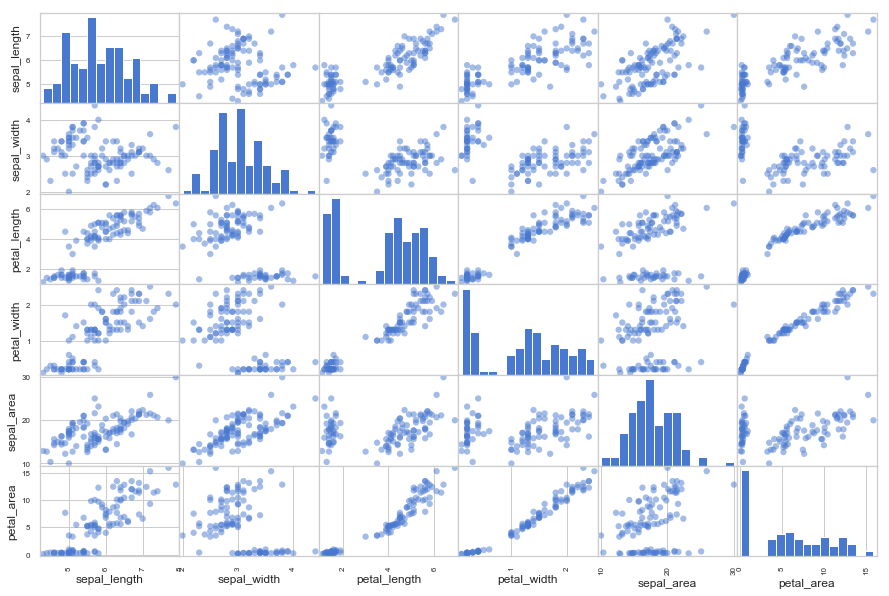

In [22]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(
    train_df[x_vars], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(15, 10), cmap=cmap)

6. Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.

  - must include null hypothesis, alternative hyp, t-test, results, summary
  - H0: the difference in sepal length between virginica and versicolor is insignificant.
  - Ha: the difference in sepal length between virginica and versicolor is substantial.
  
  - We will test if the sepal length of virginica is significantly different than that of the versicolor.
  - If there is difference, then variable sepal_length is a good choice to keep as a feature.
  - We can use a t-test here, as sepal_length is somwhat normally distributed.
  
  - I would reject the null hypothesis and conclude that there is a difference in sepal length between virginica and versicolor.

In [23]:
sl_virginica = train_df[train_df.species == "virginica"].sepal_length
sl_versicolor = train_df[train_df.species == "versicolor"].sepal_length
tstat, pval = stats.ttest_ind(sl_virginica.values, sl_versicolor.values)
print("Virginica v. Versicolor by sepal_length")
print(f"\tt-statistic: {tstat: .4}")
print(f"\tp-value: {pval: .4}")

Virginica v. Versicolor by sepal_length
	t-statistic:  4.69
	p-value:  1.364e-05


## Extra: more t-tests

In [24]:
sw_virginica = train_df[train_df.species == "virginica"].sepal_width
sw_versicolor = train_df[train_df.species == "versicolor"].sepal_width
tstat, pval = stats.ttest_ind(sw_virginica.values, sw_versicolor.values)
print("Virginica v. Versicolor by sepal_width")
print(f"\tt-statistic: {tstat: .4}")
print(f"\tp-value: {pval: .4}")

Virginica v. Versicolor by sepal_width
	t-statistic:  2.234
	p-value:  0.02877


In [25]:
sw_virginica = train_df[train_df.species == "virginica"].petal_length
sw_versicolor = train_df[train_df.species == "versicolor"].petal_length
tstat, pval = stats.ttest_ind(sw_virginica.values, sw_versicolor.values)
print("Virginica v. Versicolor by petal_length")
print(f"\tt-statistic: {tstat: .4}")
print(f"\tp-value: {pval: .4}")

Virginica v. Versicolor by petal_length
	t-statistic:  11.38
	p-value:  2.144e-17


In [26]:
sw_virginica = train_df[train_df.species == "virginica"].petal_length
sw_setosa = train_df[train_df.species == "setosa"].petal_length
tstat, pval = stats.ttest_ind(sw_virginica.values, sw_setosa.values)
print("Virginica v. Setosa by petal_length")
print(f"\tt-statistic: {tstat: .4}")
print(f"\tp-value: {pval: .4}")

Virginica v. Setosa by petal_length
	t-statistic:  44.65
	p-value:  4.088e-52
